# База знань про методи виготовлення різьби
Цей інтерактивний документ Jupyter призначений для роботи з базою знань про методи виготовлення різьби. Користувач може переглядати факти бази знань у вигляді таблиці або графа, створювати запити до бази знань, додавати (або видаляти) факти вручну або шляхом застосування механізму логічного виведення.

База знань складається з множини фактів і множини правил логічного виведення. Факти бази знань подані як триплети (суб'єкт, предикат, об'єкт) або (s, p, o). Триплети зберігаються у файлі формату CSV. Для зручного оброблення за допомогою пакету pandas ці триплети завантажуються в таблицю df (DataFrame). Ця таблиця df створюється в модулі mykb.

Віджети IPyWidgets (текстові поля і кнопки) дозволяють інтерактивну роботу з БЗ - пошук триплетів за шаблоном, додавання нових триплетів та їх видалення.

Для візуалізації графа бази знань використовуються пакети NetworkX (створює граф) та Matplotlib (візуалізує граф). NetworkX також можна використати для застосування різноманітних алгоритмів на графах.

Правила і машина виведення описані в модулі example3. Правила логічного виведення (rule1, rule2) дозволяють виводити нові факти за допомогою машини логічного виведення (reasoner). Машина виведення виконує "пряме виведення" та використовує підхід "а-ля RETE" для пришвидшення алгоритму, тобто будує дерево триплетів для швидкого пошуку.

Послідовність запуску через JupyterLite:

1. Відкрийте в браузері https://jupyter.org/try-jupyter/lab/
2. Перетягніть у File Browser (зліва) файли TextSelectInteractKB.ipynb, kb.csv, mykb.py, example3.py
3. Запустіть TextSelectInteractKB.ipynb і виконайте усі комірки

In [ ]:
# # установлюємо пакети
# %pip install -q ipywidgets==8.1.3
# %pip install -q pandas

In [1]:
!rm -rf temp_education
!git clone https://github.com/mik-nung/ThreadES.git

Cloning into 'ThreadES'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 13), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 178.26 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [1]:
# імпорт пакету для створення віджетів
import ipywidgets, pandas
# імпорт функції для візуалізації результатів
from IPython.display import display, Javascript

# Структурована база знань про інгредієнти піци

## Факти
### Інгредієнти та їх характеристики:

#### Оливки:
- ("оливки", "перевага", "кислинка")
- ("оливки", "перевага", "додають аромат")
- ("оливки", "недолік", "можуть бути занадто солоними")
- ("оливки", "недолік", "не всім подобаються")

#### Пепероні:
- ("пепероні", "перевага", "насичений смак")
- ("пепероні", "перевага", "додає гостроту")
- ("пепероні", "недолік", "високий вміст жиру")
- ("пепероні", "недолік", "може бути надто жирним")

#### Моцарела:
- ("моцарела", "перевага", "добре тягнеться")
- ("моцарела", "перевага", "додає кремовість")
- ("моцарела", "недолік", "може бути жирною")
- ("моцарела", "недолік", "не завжди добре плавиться")

#### Ананас:
- ("ананас", "перевага", "свіжий смак")
- ("ананас", "перевага", "додає солодкість")
- ("ананас", "недолік", "не всім подобається в піці")
- ("ананас", "недолік", "може перебивати інші смаки")

#### Гриби:
- ("гриби", "перевага", "додають текстуру")
- ("гриби", "перевага", "покращують смак")
- ("гриби", "недолік", "можуть бути слизькими")
- ("гриби", "недолік", "можуть бути не свіжими")

In [2]:
# з модуля mykb імпортуємо таблицю з фактами бази знань (s, p, o)
import sys
# sys.path.append(".")
sys.path.append('/content/ThreadES')
from mykb import df

In [3]:
df.tail(10)

,s,p,o
10,гриби,перевага,додають текстуру
11,оливки,перевага,додають аромат
12,гриби,перевага,покращують смак
13,оливки,недолік,можуть бути занадто солоними
14,моцарела,перевага,додає кремовість
15,гриби,недолік,можуть бути не свіжими
16,моцарела,недолік,може бути жирною
17,ананас,недолік,може перебивати інші смаки
18,ананас,недолік,не всім подобається в піці
19,пепероні,перевага,насичений смак


In [4]:
# Вивести таблицю усіх фактів (s, p, o), де s містить "ананас" і p містить "перевага"
df[df["s"].str.contains("ананас") & df["p"].str.contains("перевага")]

,s,p,o
6,ананас,перевага,свіжий смак
9,ананас,перевага,додає солодкість


In [5]:
fdf=None # pandas dataframe (таблиця)
import time
# функція виконується під час введення тексту в поля s, p, o
def f1(s, p, o):
    global fdf
    # таблиця fdf містить тільки ті тріплети, які відповідають введениму в поля s, p, o тексту
    fdf=df.loc[df["s"].str.contains(s)].loc[df["p"].str.contains(p)].loc[df["o"].str.contains(o)]
    display(fdf)
    time.sleep(1)

In [6]:
# функція виконується під час натиску на кнопки
def on_button_clicked(b):
    global df
    ndf = pandas.DataFrame([[s.value, p.value, o.value]], columns=['s', 'p', 'o']) # введений тріплет
    # якщо натиснуто "Add to KB"
    if b.description=="Add to KB":
        df=pandas.concat([df, ndf], ignore_index=True)
    # якщо натиснуто "Remove from KB"
    if b.description=="Remove from KB":
        df=pandas.concat([df, ndf], ignore_index=True).drop_duplicates(keep=False, ignore_index=True)

    # вивести назву кнопки і тріплет
    #display(Javascript(f"alert('{b.description}: ({s.value}, {p.value}, {o.value})')"))
    with output:
        print(b.description, s.value, p.value, o.value)

# створити кнопки і пов'язати їх з on_button_clicked
button1=ipywidgets.Button(description="Add to KB")
button1.on_click(on_button_clicked)
button2=ipywidgets.Button(description="Remove from KB")
button2.on_click(on_button_clicked)
output = ipywidgets.Output()
# кнопки і результати виведення
display(ipywidgets.HBox([button1, button2]), output);

Output()

In [7]:
# створити три текстові поля s, p, o
s=ipywidgets.Text(); p=ipywidgets.Text(); o=ipywidgets.Text()
# повязати їх з f1
ipywidgets.interact(f1, s=s, p=p, o=o);

interactive(children=(Text(value='', description='s'), Text(value='', description='p'), Text(value='', descrip…

In [ ]:
#df = df.drop(index=[4]) # видалити за індексом

In [12]:
# імпорт пакетів networkx і matplotlib
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
# створити орієнтований граф, у якого вершинами є s та o, а дугами - p
G=networkx.DiGraph()
for r in fdf.itertuples(): # для кожного рядка таблиці
    G.add_edges_from([(r.s, r.o)], label=r.p) # створити вершини і дугу

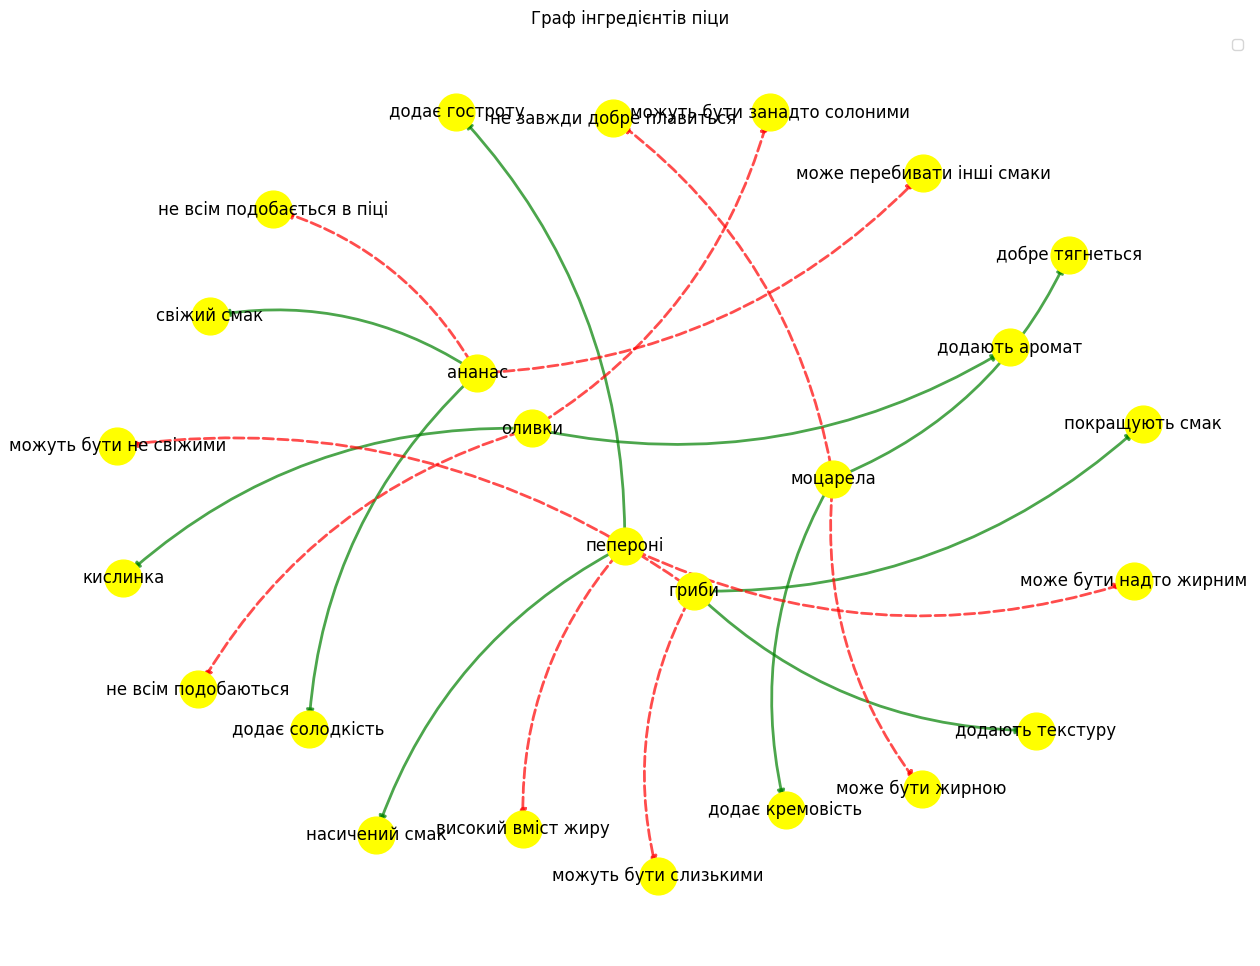

In [23]:
# Визначаємо списки дуг для переваг і недоліків
edges_p = [(u, v) for u, v, e in G.edges(data=True) if e['label'] == "перевага"]
edges_n = [(u, v) for u, v, e in G.edges(data=True) if e['label'] == "недолік"]

# Задаємо новий розмір фігури
plt.figure(figsize=(16, 12))  # Збільшений розмір

# Вибір алгоритму візуалізації графа з меншим k для зближення вузлів
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Зменшений k для ближчого розміщення

# Нарисувати вузли жовтого кольору
nx.draw_networkx_nodes(G, pos, node_color='yellow', node_size=700)

# Нарисувати мітки
nx.draw_networkx_labels(G, pos, font_size=12)

# Нарисувати дуги для переваг
nx.draw_networkx_edges(G, pos, edgelist=edges_p, connectionstyle='arc3, rad=0.2', edge_color='green', width=2, alpha=0.7, label='Перевага')

# Нарисувати дуги для недоліків
nx.draw_networkx_edges(G, pos, edgelist=edges_n, style='dashed', connectionstyle='arc3, rad=0.2', edge_color='red', width=2, alpha=0.7, label='Недолік')

# Додати легенду
plt.legend(loc='best')

# Показати граф
plt.title("Граф інгредієнтів піци")
plt.axis('off')  # Вимкнути осі
plt.savefig("/content/ThreadES/graph.svg", format="svg")

In [24]:
# імпорт правил і машини логічного виведення з модуля example3
from example3 import *

In [25]:
# наповнити множину F усіма фактами
F=set()
for row in df.itertuples():
    F.add((row.s, row.p, row.o))
# вивести нові факти за правилами rule1, rule2
A=reasoner(F, [rule1, rule2], ["перевага"], ["недолік"])
print(A) # усі факти
print(A-F) # нові факти

{('оливки', 'перевага', 'кислинка'), ('ананас', 'недолік', 'може перебивати інші смаки'), ('моцарела', 'недолік', 'не завжди добре плавиться'), ('пепероні', 'недолік', 'може бути надто жирним'), ('пепероні', 'недолік', 'високий вміст жиру'), ('моцарела', 'недолік', 'може бути жирною'), ('гриби', 'перевага', 'покращують смак'), ('може бути надто жирним', 'недолік', 'пепероні'), ('можуть бути занадто солоними', 'недолік', 'оливки'), ('ананас', 'перевага', 'додає солодкість'), ('може перебивати інші смаки', 'недолік', 'ананас'), ('оливки', 'перевага', 'додають аромат'), ('гриби', 'недолік', 'можуть бути слизькими'), ('оливки', 'недолік', 'не всім подобаються'), ('пепероні', 'перевага', 'додає гостроту'), ('ананас', 'перевага', 'свіжий смак'), ('гриби', 'перевага', 'додають текстуру'), ('можуть бути слизькими', 'недолік', 'гриби'), ('не всім подобаються', 'недолік', 'оливки'), ('не всім подобається в піці', 'недолік', 'ананас'), ('оливки', 'недолік', 'можуть бути занадто солоними'), ('може

In [26]:
df

,s,p,o
0,пепероні,недолік,може бути надто жирним
1,гриби,недолік,можуть бути слизькими
2,моцарела,недолік,не завжди добре плавиться
3,моцарела,перевага,добре тягнеться
4,оливки,перевага,кислинка
5,пепероні,недолік,високий вміст жиру
6,ананас,перевага,свіжий смак
7,пепероні,перевага,додає гостроту
8,оливки,недолік,не всім подобаються
9,ананас,перевага,додає солодкість


In [27]:
df.to_csv('/content/ThreadES/kb_food_quality.csv', index=False) # зберегти у файл